# Automatize visualization of an actual IMF forecast using Quandl

This code shows how to automatize charts of gdp and cpi forecasts for CE countries. The same can be done also for other indicators forecasted by IMF, and also for forecasts of other instituons downloadable from Quandl database

In [1]:
from matplotlib import pyplot
import pandas as pd
import quandl
from datetime import date, timedelta

In [2]:
quandl.ApiConfig.api_key = 'Your key'       #Insert your quandl key here

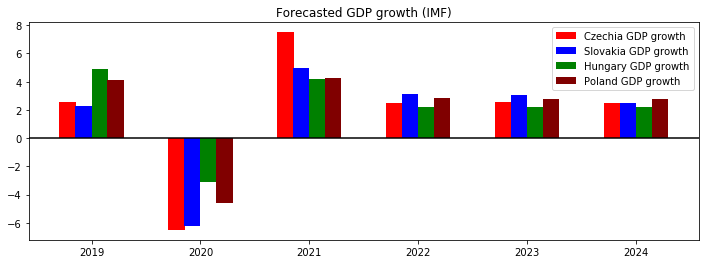

In [3]:
start_date = (date.today()-timedelta(days=(365*2))).isoformat()       #I want to start two years ago

#Lets download the data 

def data_download(quandl_code):
    data=quandl.get(quandl_code, start_date=start_date)
    return data
    
cz_gdp_imf_forecast=data_download('ODA/CZE_NGDP_RPCH')
hu_gdp_imf_forecast=data_download('ODA/HUN_NGDP_RPCH')
pl_gdp_imf_forecast=data_download('ODA/POL_NGDP_RPCH')
sk_gdp_imf_forecast=data_download('ODA/SVK_NGDP_RPCH')

#IMF reports data on yearly basis. Lets process the index to yearly basis too

def to_datetime(time_series):
    time_series.index=pd.to_datetime(time_series.index).year
    
time_series_gdp=[cz_gdp_imf_forecast,sk_gdp_imf_forecast,hu_gdp_imf_forecast,pl_gdp_imf_forecast]

for values in time_series_gdp:
    to_datetime(values)

#Lets do the dataframe

df_gdp = pd.DataFrame({
        'cz_gdp':cz_gdp_imf_forecast['Value'],
        'sk_gdp':sk_gdp_imf_forecast['Value'],
        'hu_gdp':hu_gdp_imf_forecast['Value'],
        'pl_gdp':pl_gdp_imf_forecast['Value']
        })


index = df_gdp.index      #Creates one index for all values in df
width = 0.15              #Width of the columns in our chart      
  
    
#Lets do the chart

pyplot.bar(index-0.22, df_gdp['cz_gdp'], width,label="Czechia GDP growth",color="red") 
pyplot.bar(index-0.075, df_gdp['sk_gdp'], width,label="Slovakia GDP growth",color="blue") 
pyplot.bar(index+0.075, df_gdp['hu_gdp'], width,label="Hungary GDP growth",color="green") 
pyplot.bar(index+0.22, df_gdp['pl_gdp'], width,label="Poland GDP growth",color="maroon") 
pyplot.gcf().set_size_inches((12, 4))   
pyplot.legend()
pyplot.title('Forecasted GDP growth (IMF)')
pyplot.axhline(y=0, color="black")
pyplot.show()

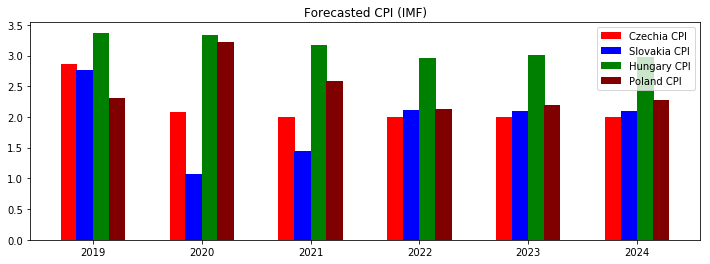

In [4]:
#Now lets do the same for CPI forecast

cz_cpi_imf_forecast=data_download('ODA/CZE_PCPIPCH')
sk_cpi_imf_forecast=data_download('ODA/SVK_PCPIPCH')
pl_cpi_imf_forecast=data_download('ODA/POL_PCPIPCH')
hu_cpi_imf_forecast=data_download('ODA/HUN_PCPIPCH')

time_series_cpi=[cz_cpi_imf_forecast,sk_cpi_imf_forecast,hu_cpi_imf_forecast,pl_cpi_imf_forecast]

for values in time_series_cpi:
    to_datetime(values)

df_cpi = pd.DataFrame({
        'cz_cpi':cz_cpi_imf_forecast['Value'],
        'sk_cpi':sk_cpi_imf_forecast['Value'],
        'hu_cpi':hu_cpi_imf_forecast['Value'],
        'pl_cpi':pl_cpi_imf_forecast['Value']
        })

pyplot.bar(index-0.22, df_cpi['cz_cpi'], width,label="Czechia CPI",color="red") 
pyplot.bar(index-0.075, df_cpi['sk_cpi'], width,label="Slovakia CPI",color="blue") 
pyplot.bar(index+0.075, df_cpi['hu_cpi'], width,label="Hungary CPI",color="green") 
pyplot.bar(index+0.22, df_cpi['pl_cpi'], width,label="Poland CPI",color="maroon") 
pyplot.gcf().set_size_inches((12, 4)) 
pyplot.legend()
pyplot.title('Forecasted CPI (IMF)')
pyplot.show()

This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services. Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, author has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, freely availible at the time of publication. Author makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.